In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing as pp
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def get_df(table_name):
    try:
        conn = sqlite3.connect('/Users/tristannisbet/Documents/travel_app/places.db')

    except Exception as e:
        print('Error durring connection: ', str(e))
    
    sql = """select * from {}""".format(table_name)
    df = pd.read_sql_query(sql, conn)

    return df

In [3]:
one = get_df('restaurants_one')
two = get_df('restaurants_two')
three = get_df('restaurants_three')
four = get_df('restaurants_four')
top_rest = get_df('restaurants')


In [4]:
all_price = pd.concat([one, two, three, four, top_rest], axis =0)
all_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25533 entries, 0 to 8185
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             25533 non-null  object 
 1   city                25533 non-null  object 
 2   name                25533 non-null  object 
 3   address             25533 non-null  object 
 4   price_level         22748 non-null  float64
 5   rating              25533 non-null  float64
 6   user_ratings_total  25533 non-null  int64  
 7   types               25533 non-null  object 
 8   latitude            25381 non-null  float64
 9   longitude           25381 non-null  float64
 10  place_id            25533 non-null  object 
 11  id                  25533 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 2.5+ MB


In [5]:
all_price[all_price['id'] == '108']

,country,city,name,address,price_level,rating,user_ratings_total,types,latitude,longitude,place_id,id
2974,Germany,Dusseldorf,Schweine Janes Altstadt,"Bolkerstraße 13, 40213 Düsseldorf, Germany",1.0,4.4,1646,"['restaurant', 'food', 'point_of_interest', 'e...",51.226030,6.772814,ChIJecRByBnKuEcRCxauD9eqEow,108
2975,Germany,Dusseldorf,Pizzeria Romantica,"Düsselthaler Str. 48, 40211 Düsseldorf, Germany",1.0,4.6,1236,"['restaurant', 'food', 'point_of_interest', 'e...",51.233844,6.792543,ChIJQZ3Q94fJuEcRo1PRG3Q_9qo,108
2976,Germany,Dusseldorf,Ayutthaya Thai Imbiss,"Behrenstraße 44, 40233 Düsseldorf, Germany",1.0,4.5,203,"['restaurant', 'food', 'point_of_interest', 'e...",51.225476,6.810816,ChIJHSiqcNHLuEcRHZWaj7-H7dY,108
2977,Germany,Dusseldorf,Dene & Gör,"Graf-Adolf-Straße 58, 40210 Düsseldorf, Germany",1.0,4.5,1169,"['restaurant', 'food', 'point_of_interest', 'e...",51.218984,6.784342,ChIJjfDZ2TvKuEcR9Ny6T-8QTPM,108
2978,Germany,Dusseldorf,Pizzeria Lupo,"Bolkerstraße 52, 40213 Düsseldorf, Germany",1.0,4.3,1503,"['restaurant', 'food', 'point_of_interest', 'e...",51.226512,6.775575,ChIJu6sMaBjKuEcRRVnMefJ-fMo,108
...,...,...,...,...,...,...,...,...,...,...,...,...
6328,Germany,Dusseldorf,Beef Brothers Düsseldorf,"Hunsrückenstraße 19, 40213 Düsseldorf, Germany",2.0,4.2,1325,"['restaurant', 'food', 'point_of_interest', 'e...",51.226604,6.775384,ChIJ92LOQhjKuEcRfBYAdPXayXs,108
6329,Germany,Dusseldorf,Indian Restaurant Jaipur,"Bahnstraße 72, 40210 Düsseldorf, Germany",2.0,4.4,595,"['restaurant', 'food', 'point_of_interest', 'e...",51.219475,6.785414,ChIJW0VIzTvKuEcRYKoebnz2utg,108
6330,Germany,Dusseldorf,Pizzeria Romantica,"Düsselthaler Str. 48, 40211 Düsseldorf, Germany",1.0,4.6,1236,"['restaurant', 'food', 'point_of_interest', 'e...",51.233844,6.792543,ChIJQZ3Q94fJuEcRo1PRG3Q_9qo,108
6331,Germany,Dusseldorf,Pizzeria Pinocchio,"Altestadt 14, 40213 Düsseldorf, Germany",2.0,4.4,747,"['meal_takeaway', 'restaurant', 'food', 'point...",51.228968,6.772840,ChIJ36k1PxnKuEcR6vmWL8vnZPM,108


In [6]:
all_price['id'] = pd.to_numeric(all_price.id)

In [7]:
all_price.price_level.fillna(0, inplace=True)

In [8]:
all_price.price_level.isnull().any()

False

In [9]:
all_price.isnull().any()

country               False
city                  False
name                  False
address               False
price_level           False
rating                False
user_ratings_total    False
types                 False
latitude               True
longitude              True
place_id              False
id                    False
dtype: bool

In [10]:
all_price

,country,city,name,address,price_level,rating,user_ratings_total,types,latitude,longitude,place_id,id
0,Hong Kong,Hong Kong,One Dim Sum,"G/F 209A-209B Tung Choi Street Prince Edward, ...",1.0,4.3,3698,"['restaurant', 'food', 'point_of_interest', 'e...",22.325450,114.169199,ChIJZTOZi8kABDQR6mCupQnajEI,1
1,Hong Kong,Hong Kong,Moti Palace Indian Restaurant,"Chungking Mansion, Shop No. 96-97, 1/F, Chungk...",1.0,4.4,162,"['restaurant', 'food', 'point_of_interest', 'e...",22.296380,114.172811,ChIJB6PtEPIABDQRAED5_CwXw9w,1
2,Hong Kong,Hong Kong,Fete Up,"Lower GF 182 Wellington Street, Central, Hong ...",1.0,4.8,71,"['meal_takeaway', 'restaurant', 'food', 'point...",22.284689,114.153056,ChIJdd55iXwABDQRzMUhIIfzfq4,1
3,Hong Kong,Hong Kong,Mr. Wong's,"10號 Shamchun St, Mong Kok, Hong Kong",1.0,4.6,713,"['restaurant', 'food', 'point_of_interest', 'e...",22.318595,114.166697,ChIJdVAihMYABDQRv8A-SDlvBi8,1
4,Hong Kong,Hong Kong,Junels Restobar Filipino Bar and Restaurant,"7 ON NING LANE SHOP 1G ON THE BASEMENT, Sai Yi...",1.0,4.6,69,"['restaurant', 'food', 'point_of_interest', 'e...",22.286712,114.138641,ChIJ1cefQYH_AzQRlBF9MTtg59U,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Mexico,Cancun,TACO y TEQUILA,"Blvd. Kukulcan 25, La Isla, Zona Hotelera, 775...",2.0,4.3,849,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJS-ivY18oTI8RisyiIBXepcQ,140
8182,Mexico,Cancun,Ember Kosher,"Blvd. Kukulcan 9, Punta Cancun, Zona Hotelera,...",0.0,4.8,362,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJiY1KsWwpTI8RHoFWLxW8m7Y,140
8183,Mexico,Cancun,Gopals,"Av Coba 81, 26, 77505 Cancún, Q.R., Mexico",1.0,4.7,177,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJWVTYofcrTI8R-X9Z4Ez6a94,140
8184,Mexico,Cancun,Tacun,"Blvd. Kukulcan KM. 11.5, El Rey, Zona Hotelera...",1.0,4.2,591,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJEbZ484soTI8RbNTpOYvbNZY,140


In [11]:
def to_city(df):
    city_df = df.groupby(['country', 'city', 'id', 'price_level'])['name'].count().to_frame()
    price_level = city_df.pivot_table(index=['country', 'city', 'id'], columns='price_level', values='name', aggfunc='first')
    price_level['avg_price'] = df.groupby(['country', 'city', 'id'])['price_level'].mean()

    
    return price_level

In [12]:
food = to_city(all_price)
food

price_level                      0.0   1.0   2.0   3.0   4.0  avg_price
country   city             id                                          
Argentina Buenos Aires     85   15.0   6.0  80.0  68.0  31.0   2.470000
Australia Melbourne        73    7.0  18.0  84.0  79.0  19.0   2.410628
          Sydney           55    3.0  26.0  14.0  67.0  29.0   2.669065
Austria   Vienna           37    5.0  65.0  86.0  78.0  19.0   2.162055
Belgium   Brussels         60   14.0  10.0  89.0  44.0  18.0   2.240000
...                              ...   ...   ...   ...   ...        ...
Uruguay   Montevideo       129  16.0   7.0  93.0  27.0   5.0   1.986486
Vietnam   Da Nang          90   36.0  18.0  78.0   8.0   NaN   1.414286
          Ha Long          48   52.0  15.0  23.0   1.0   NaN   0.703297
          Hanoi            52   31.0  22.0  81.0  15.0   1.0   1.553333
          Ho Chi Minh City 31   25.0  18.0  84.0  68.0   4.0   2.040201

[139 rows x 6 columns]

In [13]:
food.reset_index(inplace=True)
food.drop(columns = ['avg_price'], inplace=True)
food

price_level,country,city,id,0.0,1.0,2.0,3.0,4.0
0,Argentina,Buenos Aires,85,15.0,6.0,80.0,68.0,31.0
1,Australia,Melbourne,73,7.0,18.0,84.0,79.0,19.0
2,Australia,Sydney,55,3.0,26.0,14.0,67.0,29.0
3,Austria,Vienna,37,5.0,65.0,86.0,78.0,19.0
4,Belgium,Brussels,60,14.0,10.0,89.0,44.0,18.0
...,...,...,...,...,...,...,...,...
134,Uruguay,Montevideo,129,16.0,7.0,93.0,27.0,5.0
135,Vietnam,Da Nang,90,36.0,18.0,78.0,8.0,NaN
136,Vietnam,Ha Long,48,52.0,15.0,23.0,1.0,NaN
137,Vietnam,Hanoi,52,31.0,22.0,81.0,15.0,1.0


In [14]:
#Drop the second Cancun with no '
#Rename K
food[food['country'] =='Mexico']

price_level,country,city,id,0.0,1.0,2.0,3.0,4.0
73,Mexico,Cancun,140,29.0,14.0,79.0,22.0,8.0
74,Mexico,Cancún,40,22.0,8.0,84.0,24.0,7.0
75,Mexico,Mexico City,101,NaN,16.0,60.0,60.0,33.0


In [15]:
food.columns

Index(['country', 'city', 'id', 0.0, 1.0, 2.0, 3.0, 4.0], dtype='object', name='price_level')

In [16]:
#Dropping the second Cancún
food = food.drop(food[food.id == 40].index)

nan_row = {'country' : None, 'city': 'Zx', 'id': 200, 0.0: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}
food = food.append(nan_row, ignore_index=True)

In [17]:

food

price_level,country,city,id,0.0,1.0,2.0,3.0,4.0
0,Argentina,Buenos Aires,85,15.0,6.0,80.0,68.0,31.0
1,Australia,Melbourne,73,7.0,18.0,84.0,79.0,19.0
2,Australia,Sydney,55,3.0,26.0,14.0,67.0,29.0
3,Austria,Vienna,37,5.0,65.0,86.0,78.0,19.0
4,Belgium,Brussels,60,14.0,10.0,89.0,44.0,18.0
...,...,...,...,...,...,...,...,...
134,Vietnam,Da Nang,90,36.0,18.0,78.0,8.0,NaN
135,Vietnam,Ha Long,48,52.0,15.0,23.0,1.0,NaN
136,Vietnam,Hanoi,52,31.0,22.0,81.0,15.0,1.0
137,Vietnam,Ho Chi Minh City,31,25.0,18.0,84.0,68.0,4.0


In [18]:
le = pp.LabelEncoder()
le.fit(food.city)
#numpy.save('classes.npy', encoder.classes_)

food['label_id'] = le.transform(food.city)
food

price_level,country,city,id,0.0,1.0,2.0,3.0,4.0,label_id
0,Argentina,Buenos Aires,85,15.0,6.0,80.0,68.0,31.0,21
1,Australia,Melbourne,73,7.0,18.0,84.0,79.0,19.0,83
2,Australia,Sydney,55,3.0,26.0,14.0,67.0,29.0,122
3,Austria,Vienna,37,5.0,65.0,86.0,78.0,19.0,131
4,Belgium,Brussels,60,14.0,10.0,89.0,44.0,18.0,18
...,...,...,...,...,...,...,...,...,...
134,Vietnam,Da Nang,90,36.0,18.0,78.0,8.0,NaN,34
135,Vietnam,Ha Long,48,52.0,15.0,23.0,1.0,NaN,50
136,Vietnam,Hanoi,52,31.0,22.0,81.0,15.0,1.0,53
137,Vietnam,Ho Chi Minh City,31,25.0,18.0,84.0,68.0,4.0,55


In [19]:
food[food['city'] == "Cancun"]

price_level,country,city,id,0.0,1.0,2.0,3.0,4.0,label_id
73,Mexico,Cancun,140,29.0,14.0,79.0,22.0,8.0,23


In [20]:
food[food['label_id'] == 138]

price_level,country,city,id,0.0,1.0,2.0,3.0,4.0,label_id
138,None,Zx,200,0.0,0.0,0.0,0.0,0.0,138


In [21]:
food = food.drop(food[food.id == 200].index)


In [22]:
#Reverse encoder
#list(le.inverse_transform(food.label_id))

In [23]:
food_new = food[['label_id', 1.0, 2.0, 3.0, 4.0]].copy()
food_new

price_level,label_id,1.0,2.0,3.0,4.0
0,21,6.0,80.0,68.0,31.0
1,83,18.0,84.0,79.0,19.0
2,122,26.0,14.0,67.0,29.0
3,131,65.0,86.0,78.0,19.0
4,18,10.0,89.0,44.0,18.0
...,...,...,...,...,...
133,87,7.0,93.0,27.0,5.0
134,34,18.0,78.0,8.0,NaN
135,50,15.0,23.0,1.0,NaN
136,53,22.0,81.0,15.0,1.0


In [24]:
food_new.iloc[23]

price_level
label_id    16.0
1.0          7.0
2.0         84.0
3.0         78.0
4.0         17.0
Name: 23, dtype: float64

In [25]:
food_new.sort_values('label_id', inplace=True)
food_new.set_index('label_id', inplace=True)

In [26]:
food_new.fillna(0, inplace=True)

In [27]:
normalized = pp.normalize(food_new)
normalized_city = pd.DataFrame(normalized)
normalized_city

,0,1,2,3
0,0.578908,0.673811,0.436554,0.142354
1,0.093542,0.976996,0.187084,0.041574
2,0.133440,0.987457,0.080064,0.026688
3,0.073191,0.704468,0.704468,0.045745
4,0.475169,0.643777,0.590129,0.107296
...,...,...,...,...
133,0.473048,0.526457,0.625644,0.328082
134,0.000000,1.000000,0.000000,0.000000
135,0.000000,1.000000,0.000000,0.000000
136,0.135457,0.880471,0.406371,0.203186


In [28]:
sim_city_food = pd.DataFrame(cosine_similarity(normalized_city))

In [29]:
sim_city_food

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,1.000000,0.800054,0.781360,0.831100,0.981761,0.776006,0.932362,0.973450,0.923121,0.942193,...,0.931139,0.873172,0.969450,0.984546,0.894898,0.948415,0.673811,0.673811,0.878016,0.951727
1,0.800054,1.000000,0.993312,0.828806,0.788281,0.997413,0.950682,0.755874,0.902290,0.680913,...,0.705656,0.808844,0.901241,0.784797,0.863860,0.689284,0.976996,0.976996,0.957361,0.835318
2,0.781360,0.993312,1.000000,0.763022,0.749221,0.997656,0.944415,0.712292,0.858111,0.631736,...,0.658533,0.744826,0.900125,0.746575,0.808383,0.641825,0.987457,0.987457,0.925461,0.787407
3,0.831100,0.828806,0.763022,1.000000,0.908934,0.793357,0.831929,0.898636,0.970599,0.861265,...,0.855457,0.979920,0.801094,0.901417,0.988709,0.861250,0.704468,0.704468,0.925748,0.959668
4,0.981761,0.788281,0.749221,0.908934,1.000000,0.756458,0.901261,0.993092,0.957063,0.964436,...,0.947802,0.935126,0.928501,0.999328,0.948102,0.968112,0.643777,0.643777,0.892805,0.987116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.948415,0.689284,0.641825,0.861250,0.968112,0.645037,0.847286,0.990577,0.911630,0.999816,...,0.994191,0.930504,0.868696,0.975057,0.912018,1.000000,0.526457,0.526457,0.848513,0.955927
134,0.673811,0.976996,0.987457,0.704468,0.643777,0.987143,0.884184,0.602992,0.790178,0.516380,...,0.551129,0.671889,0.820456,0.639834,0.740252,0.526457,1.000000,1.000000,0.880471,0.698927
135,0.673811,0.976996,0.987457,0.704468,0.643777,0.987143,0.884184,0.602992,0.790178,0.516380,...,0.551129,0.671889,0.820456,0.639834,0.740252,0.526457,1.000000,1.000000,0.880471,0.698927
136,0.878016,0.957361,0.925461,0.925748,0.892805,0.934417,0.964880,0.885834,0.977853,0.844436,...,0.866556,0.937994,0.919890,0.893407,0.960167,0.848513,0.880471,0.880471,1.000000,0.939299


### Survey / user food data

In [30]:
survey_food = pd.read_csv('/Users/tristannisbet/Documents/SM/survey_food_only.csv', index_col=0)
survey_food

,nationality,age,gender,food_one,food_two,food_three,food_four
0,United States,26-40,Female,Always,Always,Rarely,Never
1,United States,15-25,Female,Sometimes,Often,Sometimes,Sometimes
2,United States,15-25,Female,Sometimes,Often,Sometimes,Rarely
3,United States,26-40,Female,Sometimes,Often,Sometimes,Sometimes
4,United States,26-40,Female,Often,Often,Rarely,Rarely
...,...,...,...,...,...,...,...
148,Canada,15-25,Male,Sometimes,Often,Rarely,Rarely
149,United States,26-40,Male,Rarely,Often,Sometimes,Rarely
150,United States,26-40,Male,Sometimes,Often,Rarely,Rarely
151,United States,26-40,Male,Often,Always,Sometimes,Rarely


In [31]:
replace_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Always': 4}

df_food_replace = survey_food.replace(replace_map)

In [32]:
df_food_replace.drop(columns=['nationality', 'age', 'gender'], inplace=True)

In [33]:
normalized_user = pd.DataFrame(pp.normalize(df_food_replace))
normalized_user

,0,1,2,3
0,0.696311,0.696311,0.174078,0.000000
1,0.436436,0.654654,0.436436,0.436436
2,0.471405,0.707107,0.471405,0.235702
3,0.436436,0.654654,0.436436,0.436436
4,0.670820,0.670820,0.223607,0.223607
...,...,...,...,...
148,0.516398,0.774597,0.258199,0.258199
149,0.258199,0.774597,0.516398,0.258199
150,0.516398,0.774597,0.258199,0.258199
151,0.547723,0.730297,0.365148,0.182574


In [34]:
normalized_city

,0,1,2,3
0,0.578908,0.673811,0.436554,0.142354
1,0.093542,0.976996,0.187084,0.041574
2,0.133440,0.987457,0.080064,0.026688
3,0.073191,0.704468,0.704468,0.045745
4,0.475169,0.643777,0.590129,0.107296
...,...,...,...,...
133,0.473048,0.526457,0.625644,0.328082
134,0.000000,1.000000,0.000000,0.000000
135,0.000000,1.000000,0.000000,0.000000
136,0.135457,0.880471,0.406371,0.203186


In [35]:
cosine_sim = pd.DataFrame(cosine_similarity(normalized_user, normalized_city))
cosine_sim

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.948276,0.777994,0.794430,0.664125,0.881863,0.775324,0.901017,0.850985,0.803238,0.793378,...,0.778443,0.692994,0.960184,0.883276,0.746197,0.804877,0.696311,0.696311,0.778142,0.824331
1,0.946425,0.780214,0.751271,0.820546,0.933213,0.743685,0.921365,0.958680,0.913246,0.965157,...,0.981919,0.905368,0.921076,0.944892,0.894085,0.967342,0.654654,0.654654,0.901554,0.930533
2,0.988703,0.832928,0.805175,0.875508,0.982696,0.803272,0.950697,0.984734,0.956527,0.963111,...,0.963579,0.924461,0.964587,0.987282,0.935289,0.967519,0.707107,0.707107,0.925899,0.973623
3,0.946425,0.780214,0.751271,0.820546,0.933213,0.743685,0.921365,0.958680,0.913246,0.965157,...,0.981919,0.905368,0.921076,0.944892,0.894085,0.967342,0.654654,0.654654,0.901554,0.930533
4,0.969797,0.769268,0.775791,0.689423,0.906561,0.754167,0.924125,0.902097,0.833275,0.875199,...,0.875132,0.756829,0.968136,0.914991,0.783359,0.883748,0.670820,0.670820,0.817806,0.858688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.970352,0.864122,0.861352,0.777179,0.924119,0.846563,0.977309,0.921176,0.904251,0.890790,...,0.902439,0.834878,0.990292,0.931676,0.860096,0.898324,0.774597,0.774597,0.909347,0.906366
149,0.933596,0.888275,0.847571,0.940174,0.953801,0.855666,0.951658,0.958246,0.989890,0.935233,...,0.947471,0.973663,0.929037,0.956649,0.980109,0.937724,0.774597,0.774597,0.979296,0.981389
150,0.970352,0.864122,0.861352,0.777179,0.924119,0.846563,0.977309,0.921176,0.904251,0.890790,...,0.902439,0.834878,0.990292,0.931676,0.860096,0.898324,0.774597,0.774597,0.909347,0.906366
151,0.994560,0.840636,0.828333,0.820146,0.965484,0.819603,0.961319,0.958051,0.926153,0.925014,...,0.923428,0.866355,0.987197,0.969854,0.891054,0.931921,0.730297,0.730297,0.902680,0.941990


In [36]:
def find_similar_n(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [37]:
top_10_city = find_similar_n(cosine_sim,10)
top_10_city

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,79,102,68,45,95,114,99,80,50,125
1,75,76,115,128,31,10,113,58,86,57
2,103,85,57,111,92,78,46,74,15,58
3,75,76,115,128,31,10,113,58,86,57
4,95,102,11,125,45,114,79,57,0,130
...,...,...,...,...,...,...,...,...,...,...
148,130,95,57,103,11,114,51,125,45,102
149,117,8,123,100,48,41,60,20,137,132
150,130,95,57,103,11,114,51,125,45,102
151,57,125,51,0,103,114,78,130,95,92


In [38]:
user_1 = top_10_city.iloc[0, 0:5].values.tolist()
user_1

[79, 102, 68, 45, 95]

In [39]:
for city in user_1:
    city2 = food[food.label_id == city]
    print(city2.city)

81    Manila
Name: city, dtype: object
85    Porto
Name: city, dtype: object
108    Krabi
Name: city, dtype: object
58    Florence
Name: city, dtype: object
128    Orlando
Name: city, dtype: object


# Attraction Similarity

In [40]:
city_attraction = pd.read_csv('/Users/tristannisbet/Documents/SM/city_attraction_only.csv', index_col=0)
city_attraction

,city,id,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
country,,,,,,,,,,,,,
Argentina,Buenos Aires,85,1,16,17,1,0,1,0,0,0,2,1
Australia,Melbourne,73,2,10,14,5,1,2,1,1,0,4,2
Australia,Sydney,55,1,8,15,2,1,2,0,0,1,2,1
Austria,Vienna,37,1,25,7,0,1,3,1,0,0,6,2
Belgium,Brussels,60,2,20,9,0,0,0,1,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,Montevideo,129,1,18,9,0,0,0,1,0,0,2,1
Vietnam,Da Nang,90,1,7,5,0,0,0,0,0,0,14,1
Vietnam,Ha Long,48,1,2,1,0,0,0,0,0,1,0,1


In [41]:
# Drop Guilin because there were no restaurants found
city_attraction.reset_index(inplace=True)
city_attraction = city_attraction.drop(city_attraction[city_attraction.id == 80].index)
city_attraction = city_attraction.drop(city_attraction[city_attraction.id == 40].index)


In [42]:
city_attraction.set_index('country', inplace=True)
city_attraction.sort_values('country')

,city,id,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
country,,,,,,,,,,,,,
Argentina,Buenos Aires,85,1,16,17,1,0,1,0,0,0,2,1
Australia,Melbourne,73,2,10,14,5,1,2,1,1,0,4,2
Australia,Sydney,55,1,8,15,2,1,2,0,0,1,2,1
Austria,Vienna,37,1,25,7,0,1,3,1,0,0,6,2
Belgium,Brussels,60,2,20,9,0,0,0,1,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,Montevideo,129,1,18,9,0,0,0,1,0,0,2,1
Vietnam,Hanoi,52,0,11,6,0,0,1,0,0,0,9,0
Vietnam,Da Nang,90,1,7,5,0,0,0,0,0,0,14,1


In [43]:
city_attraction[city_attraction['id'] == 40]

,city,id,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
country,,,,,,,,,,,,,


In [44]:
city_attraction.shape

(138, 13)

In [45]:
city_attraction.sort_values('id', inplace=True)

In [46]:
for i in city_attraction.id:
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140


In [48]:
city_attraction['city'] = city_attraction['city'].str.replace('Kraków', 'Krakow')
city_attraction['city'] = city_attraction['city'].str.replace('Muğla', 'Mugla')
city_attraction['city'] = city_attraction['city'].str.replace('São Paulo', 'Sao Paulo')
city_attraction['city'] = city_attraction['city'].str.replace('Zürich', 'Zurich')
city_attraction['city'] = city_attraction['city'].str.replace('Düsseldorf', 'Dusseldorf')
city_attraction['city'] = city_attraction['city'].str.replace('Frankfurt am Main', 'Frankfurt')

In [50]:
#le = pp.LabelEncoder()
city_attraction['label_id'] = le.transform(city_attraction.city)
city_attraction

,city,id,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store,label_id
country,,,,,,,,,,,,,,
Hong Kong,Hong Kong,1,4,7,5,1,0,0,0,0,0,4,0,56
Thailand,Bangkok,2,1,13,10,2,1,1,0,0,0,18,1,10
United Kingdom,London,3,0,19,8,4,0,1,1,1,0,4,4,75
Macau,Macau,4,2,10,6,1,0,1,0,0,0,17,0,77
Singapore,Singapore,5,3,7,16,0,1,3,0,0,0,4,2,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ecuador,Quito,136,2,13,18,1,0,0,0,0,0,15,0,107
China,Tianjin,137,1,10,13,0,1,1,0,0,0,4,0,126
China,Qingdao,138,0,2,6,0,2,1,0,0,0,2,1,106


In [51]:
city_attraction.sort_values('label_id', inplace=True)
city_attraction_clean = city_attraction.copy()
city_attraction_clean.set_index('label_id', inplace=True)
city_attraction_clean.drop(columns=['city', 'id'], inplace=True)
city_attraction_clean

,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
label_id,,,,,,,,,,,
0,3,6,18,4,0,1,0,0,1,2,0
1,0,4,1,1,0,0,0,0,2,20,2
2,0,5,6,0,0,0,0,0,1,44,0
3,0,11,3,2,0,0,1,0,0,12,2
4,0,29,7,2,1,1,0,1,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...
133,0,16,23,1,0,1,1,0,0,6,0
134,0,10,5,0,0,1,0,0,0,12,0
135,0,5,9,0,1,0,0,0,1,3,0


In [52]:
df = pd.read_csv('/Users/tristannisbet/Documents/SM/survey_responses.csv')

In [53]:
df.rename(columns = {'What country are you from? ': 'nationality', 'Age Range': 'age', 'Gender': 'gender',
                    '1. Choose your top favorite 3-5 cities you have traveled to that are on this list.  - Favorite City #1': 'favorite_city_one',
                    '2. Favorite city #2': 'favorite_city_two', '3. Favorite city #3': 'favorite_city_three',
                    '4. Favorite city #4': 'favorite_city_four', '5. Favorite city #5': 'favorite_city_five',
                    "6. If there's a city you have been and loved that is not on this list, add it below. ": 'extra_favorite',
                    "7. What cities on this list have you been to and not enjoyed?   - Least favorite city #1": 'least_favorite_one',
                    '8. Least favorite city #2': 'least_favorite_two', 
                    "9. If there's a city you have been to and haven't liked that is not on this list, add it below": 'extra_least_favorite',
                    "What price range of restaurant do you eat at when you travel? [Price level: 1 (Fast/Cheap Eats)]": 'food_one',
                    "What price range of restaurant do you eat at when you travel? [Price level: 2 (Casual Dining)]": 'food_two',
                    "What price range of restaurant do you eat at when you travel? [Price level: 3 (Upscale Dining)]": 'food_three',
                    "What price range of restaurant do you eat at when you travel? [Price level: 4 (Fine Dining/High End)]": 'food_four',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Art Gallery]": 'art_gallery',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Library]": 'library',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Museum ]": 'museum',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Aquarium]": 'aquarium',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Amusement Park ]": 'amusement_park',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Zoo]": 'zoo',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Movie Theater]": 'movie_theater',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Mall / Souvenir shop ]": 'store',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Park ]": 'park',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Natural Feature / Beach]": 'natural_feature',
                    "From the following types of tourist attractions, which ones are you likely to go do while traveling? [Place of Worship (Church/Temple)]": 'place_of_worship'}, inplace=True )

In [54]:
df

,Timestamp,nationality,age,gender,favorite_city_one,favorite_city_two,favorite_city_three,favorite_city_four,favorite_city_five,extra_favorite,...,aquarium,amusement_park,zoo,movie_theater,store,park,natural_feature,place_of_worship,ID,id
0,6/1/20 9:42,United States,26-40,Female,Krabi,Rome,Budapest,NaN,NaN,"Hakone, Japan",...,1 ( Would NOT go),1 ( Would NOT go),1 ( Would NOT go),2,4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),NaN,0.0
1,6/1/20 9:49,United States,15-25,Female,Cancun,Las Vegas,Los Angeles,New York City,London,NaN,...,2,3,3,3,3,3,3,1 ( Would NOT go),NaN,1.0
2,6/1/20 9:57,United States,15-25,Female,Sydney,London,Dublin,Prague,Rome,None,...,4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),1 ( Would NOT go),4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),3,NaN,2.0
3,6/1/20 10:16,United States,26-40,Female,Rome,London,Florence,Mexico City,Munich,Astoria,...,3,2,2,3,3,4 (Definitely would go),4 (Definitely would go),1 ( Would NOT go),NaN,NaN
4,6/1/20 10:17,United States,26-40,Female,Denpasar,Shanghai,Kyoto,New York City,Vancouver,NaN,...,1 ( Would NOT go),2,1 ( Would NOT go),3,2,4 (Definitely would go),4 (Definitely would go),1 ( Would NOT go),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,6/13/20 2:11,Canada,15-25,Male,Melbourne,Vancouver,Sydney,NaN,NaN,NaN,...,3,3,2,1 ( Would NOT go),2,3,3,4 (Definitely would go),NaN,NaN
149,6/13/20 14:52,United States,26-40,Male,Atlanta,New York City,Cairo,Honolulu,San Francisco,Seattle,...,4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),2,2,1 ( Would NOT go),NaN,NaN
150,6/14/20 1:50,United States,26-40,Male,Berlin,Los Angeles,Istanbul,NaN,NaN,NaN,...,2,1 ( Would NOT go),2,1 ( Would NOT go),1 ( Would NOT go),3,4 (Definitely would go),2,NaN,NaN
151,6/16/20 22:28,United States,26-40,Male,Florence,Miami,Las Vegas,NaN,NaN,NaN,...,2,2,1 ( Would NOT go),1 ( Would NOT go),3,3,4 (Definitely would go),3,NaN,NaN


In [55]:
user_attraction = df[['nationality', 'age', 'gender', 'amusement_park', 'museum', 'park', 'art_gallery', 'aquarium', 'zoo', 
                     'library', 'movie_theater', 'natural_feature', 'place_of_worship', 'store']].copy()
user_attraction

,nationality,age,gender,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
0,United States,26-40,Female,1 ( Would NOT go),2,4 (Definitely would go),2,1 ( Would NOT go),1 ( Would NOT go),2,2,4 (Definitely would go),4 (Definitely would go),4 (Definitely would go)
1,United States,15-25,Female,3,2,3,1 ( Would NOT go),2,3,1 ( Would NOT go),3,3,1 ( Would NOT go),3
2,United States,15-25,Female,4 (Definitely would go),3,4 (Definitely would go),3,4 (Definitely would go),4 (Definitely would go),2,1 ( Would NOT go),4 (Definitely would go),3,4 (Definitely would go)
3,United States,26-40,Female,2,4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),3,2,3,3,4 (Definitely would go),1 ( Would NOT go),3
4,United States,26-40,Female,2,3,4 (Definitely would go),2,1 ( Would NOT go),1 ( Would NOT go),3,3,4 (Definitely would go),1 ( Would NOT go),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Canada,15-25,Male,3,3,3,2,3,2,4 (Definitely would go),1 ( Would NOT go),3,4 (Definitely would go),2
149,United States,26-40,Male,4 (Definitely would go),4 (Definitely would go),2,4 (Definitely would go),4 (Definitely would go),4 (Definitely would go),3,4 (Definitely would go),2,1 ( Would NOT go),4 (Definitely would go)
150,United States,26-40,Male,1 ( Would NOT go),3,3,3,2,2,2,1 ( Would NOT go),4 (Definitely would go),2,1 ( Would NOT go)
151,United States,26-40,Male,2,3,3,3,2,1 ( Would NOT go),2,1 ( Would NOT go),4 (Definitely would go),3,3


In [56]:
user_attraction.drop(columns=['nationality', 'age', 'gender'], inplace=True)

In [57]:
replace_map = {'1 ( Would NOT go)': 1, '2': 2, '3': 3, '4 (Definitely would go)': 4}

user_attraction = user_attraction.replace(replace_map)


In [58]:
user_attraction

,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
0,1,2,4,2,1,1,2,2,4,4,4
1,3,2,3,1,2,3,1,3,3,1,3
2,4,3,4,3,4,4,2,1,4,3,4
3,2,4,4,4,3,2,3,3,4,1,3
4,2,3,4,2,1,1,3,3,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
148,3,3,3,2,3,2,4,1,3,4,2
149,4,4,2,4,4,4,3,4,2,1,4
150,1,3,3,3,2,2,2,1,4,2,1
151,2,3,3,3,2,1,2,1,4,3,3


In [59]:
city_attraction_clean

,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
label_id,,,,,,,,,,,
0,3,6,18,4,0,1,0,0,1,2,0
1,0,4,1,1,0,0,0,0,2,20,2
2,0,5,6,0,0,0,0,0,1,44,0
3,0,11,3,2,0,0,1,0,0,12,2
4,0,29,7,2,1,1,0,1,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...
133,0,16,23,1,0,1,1,0,0,6,0
134,0,10,5,0,0,1,0,0,0,12,0
135,0,5,9,0,1,0,0,0,1,3,0


In [60]:
normalized_user_a = pd.DataFrame(pp.normalize(user_attraction))
normalized_user_a

,0,1,2,3,4,5,6,7,8,9,10
0,0.109764,0.219529,0.439057,0.219529,0.109764,0.109764,0.219529,0.219529,0.439057,0.439057,0.439057
1,0.372104,0.248069,0.372104,0.124035,0.248069,0.372104,0.124035,0.372104,0.372104,0.124035,0.372104
2,0.353553,0.265165,0.353553,0.265165,0.353553,0.353553,0.176777,0.088388,0.353553,0.265165,0.353553
3,0.191565,0.383131,0.383131,0.383131,0.287348,0.191565,0.287348,0.287348,0.383131,0.095783,0.287348
4,0.232495,0.348743,0.464991,0.232495,0.116248,0.116248,0.348743,0.348743,0.464991,0.116248,0.232495
...,...,...,...,...,...,...,...,...,...,...,...
148,0.316228,0.316228,0.316228,0.210819,0.316228,0.210819,0.421637,0.105409,0.316228,0.421637,0.210819
149,0.350823,0.350823,0.175412,0.350823,0.350823,0.350823,0.263117,0.350823,0.175412,0.087706,0.350823
150,0.127000,0.381000,0.381000,0.381000,0.254000,0.254000,0.254000,0.127000,0.508001,0.254000,0.127000
151,0.230940,0.346410,0.346410,0.346410,0.230940,0.115470,0.230940,0.115470,0.461880,0.346410,0.346410


In [61]:
normalized_city_a = pd.DataFrame(pp.normalize(city_attraction_clean))
normalized_city_a

,0,1,2,3,4,5,6,7,8,9,10
0,0.151717,0.303433,0.910299,0.202289,0.000000,0.050572,0.000000,0.000000,0.050572,0.101144,0.000000
1,0.000000,0.193801,0.048450,0.048450,0.000000,0.000000,0.000000,0.000000,0.096900,0.969003,0.096900
2,0.000000,0.111859,0.134231,0.000000,0.000000,0.000000,0.000000,0.000000,0.022372,0.984362,0.000000
3,0.000000,0.653882,0.178331,0.118888,0.000000,0.000000,0.059444,0.000000,0.000000,0.713326,0.118888
4,0.000000,0.898388,0.216852,0.061958,0.030979,0.030979,0.000000,0.030979,0.000000,0.371747,0.030979
...,...,...,...,...,...,...,...,...,...,...,...
133,0.000000,0.557386,0.801243,0.034837,0.000000,0.034837,0.034837,0.000000,0.000000,0.209020,0.000000
134,0.000000,0.608581,0.304290,0.000000,0.000000,0.060858,0.000000,0.000000,0.000000,0.730297,0.000000
135,0.000000,0.462250,0.832050,0.000000,0.092450,0.000000,0.000000,0.000000,0.092450,0.277350,0.000000
136,0.458831,0.344124,0.573539,0.000000,0.000000,0.000000,0.000000,0.000000,0.114708,0.573539,0.000000


In [62]:
sim_city_a = pd.DataFrame(cosine_similarity(normalized_city_a))

In [63]:
cosine_sim_a = pd.DataFrame(cosine_similarity(normalized_user_a, normalized_city_a))
cosine_sim_a

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.599510,0.584991,0.525505,0.626382,0.496455,0.741575,0.565143,0.633738,0.609336,0.613448,...,0.553342,0.555368,0.519200,0.476627,0.560658,0.585044,0.594524,0.639306,0.679905,0.674164
1,0.545725,0.264418,0.208117,0.383401,0.399616,0.631361,0.384353,0.507457,0.564305,0.327191,...,0.490606,0.490290,0.230079,0.451129,0.419190,0.483947,0.377426,0.516016,0.583338,0.527408
2,0.572159,0.406831,0.346047,0.509652,0.465490,0.691231,0.484581,0.561016,0.575524,0.468295,...,0.493568,0.507774,0.370951,0.495340,0.502391,0.514219,0.484123,0.555662,0.648886,0.584634
3,0.610336,0.269160,0.197141,0.483963,0.519267,0.629385,0.447493,0.571325,0.599683,0.327608,...,0.538572,0.560349,0.262067,0.547443,0.526027,0.570584,0.431357,0.584437,0.538364,0.592815
4,0.652557,0.281611,0.226259,0.469894,0.496969,0.667033,0.454435,0.604498,0.635623,0.350828,...,0.595041,0.606552,0.266847,0.526351,0.504484,0.615551,0.445700,0.634079,0.613388,0.620617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.543739,0.546459,0.499939,0.639125,0.548598,0.712153,0.608048,0.612624,0.532363,0.605603,...,0.474161,0.505556,0.535262,0.547695,0.582943,0.547144,0.609425,0.584705,0.713385,0.617535
149,0.425805,0.229465,0.153047,0.422299,0.451027,0.495142,0.384671,0.422543,0.431971,0.276455,...,0.346911,0.369800,0.237935,0.491515,0.458092,0.388033,0.352282,0.381095,0.452725,0.430946
150,0.622999,0.418416,0.355154,0.573752,0.566543,0.693470,0.557013,0.621564,0.588398,0.465612,...,0.541734,0.568947,0.403430,0.570323,0.580412,0.601699,0.548758,0.634023,0.611852,0.636020
151,0.589797,0.514698,0.436574,0.631486,0.561610,0.705318,0.583511,0.618115,0.573536,0.544664,...,0.510462,0.535551,0.479254,0.552829,0.603106,0.567185,0.576237,0.608487,0.675512,0.638287


In [64]:
top_city_a = find_similar_n(cosine_sim_a,10)
top_city_a

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,98,42,39,5,25,12,70,29,85,113
1,98,40,50,101,63,5,83,70,127,95
2,98,40,101,70,42,5,50,83,55,127
3,83,98,50,59,103,65,44,116,42,113
4,50,83,63,42,122,5,27,40,113,103
...,...,...,...,...,...,...,...,...,...,...
148,98,42,70,91,25,55,101,39,136,23
149,98,50,40,83,59,101,105,116,44,75
150,98,83,70,42,103,113,59,44,5,101
151,98,42,50,70,44,55,83,39,5,113


### New dataframe build
Every cityxuser in row, 
Food sim, attraction sim, rank columns

In [65]:
cities = get_df('cities')

In [66]:
cities = cities.drop(cities[cities.city == 'Guilin'].index)


In [67]:
cities[cities['country'] == 'Germany']

,id,city,country
40,41,Berlin,Germany
55,56,Munich,Germany
86,87,Frankfurt,Germany
107,108,Dusseldorf,Germany
114,115,Hamburg,Germany


In [68]:
#Adding user_id to cityname 

lst = []
for i in range(153):
    for c in cities.city:

        a = c + "_" + str(i)
        lst.append(a)

In [69]:
new = pd.DataFrame(lst)
new

,0
0,Hong Kong_0
1,Bangkok_0
2,London_0
3,Macau_0
4,Singapore_0
...,...
21109,Accra_152
21110,Quito_152
21111,Tianjin_152
21112,Qingdao_152


In [70]:
split = new[0].str.split("_", n = 1, expand = True)
split

,0,1
0,Hong Kong,0
1,Bangkok,0
2,London,0
3,Macau,0
4,Singapore,0
...,...,...
21109,Accra,152
21110,Quito,152
21111,Tianjin,152
21112,Qingdao,152


In [71]:
split.rename(columns={0:'city', 1:'user'}, inplace=True)
split

,city,user
0,Hong Kong,0
1,Bangkok,0
2,London,0
3,Macau,0
4,Singapore,0
...,...,...
21109,Accra,152
21110,Quito,152
21111,Tianjin,152
21112,Qingdao,152


In [72]:
sim_score_rank = pd.merge(left=split, right=food[['label_id', 'city']], on='city')
sim_score_rank.rename(columns={'label_id': 'city_id'}, inplace=True)

In [73]:
sim_score_rank[sim_score_rank['city'] == 'Cancun']

,city,user,city_id
5967,Cancun,0,23
5968,Cancun,1,23
5969,Cancun,2,23
5970,Cancun,3,23
5971,Cancun,4,23
...,...,...,...
6115,Cancun,148,23
6116,Cancun,149,23
6117,Cancun,150,23
6118,Cancun,151,23


In [74]:
city_attraction_clean

,amusement_park,museum,park,art_gallery,aquarium,zoo,library,movie_theater,natural_feature,place_of_worship,store
label_id,,,,,,,,,,,
0,3,6,18,4,0,1,0,0,1,2,0
1,0,4,1,1,0,0,0,0,2,20,2
2,0,5,6,0,0,0,0,0,1,44,0
3,0,11,3,2,0,0,1,0,0,12,2
4,0,29,7,2,1,1,0,1,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...
133,0,16,23,1,0,1,1,0,0,6,0
134,0,10,5,0,0,1,0,0,0,12,0
135,0,5,9,0,1,0,0,0,1,3,0


In [75]:
sim_score_rank['user'] = pd.to_numeric(sim_score_rank['user'])


In [76]:
sim_score_rank.sort_values(['user', 'city_id'], inplace=True)

In [77]:
lst = []
lst2 = []
lst3 = []
for user, city_id in zip(sim_score_rank.user, sim_score_rank.city_id):
    lst.append(cosine_sim.iloc[user, city_id])
    lst2.append(user)
    lst3.append(city_id)

In [78]:
sim_score_rank['food_sim'] = lst

In [79]:
sim_score_rank


,city,user,city_id,food_sim
13923,Abu Dhabi,0,0,0.948276
20196,Accra,0,1,0.777994
3825,Agra,0,2,0.794430
19431,Amman,0,3,0.664125
3672,Amsterdam,0,4,0.881863
...,...,...,...,...
15911,Washington D.C.,152,133,0.831439
17900,Xi'an,152,134,0.688247
18512,Xiamen,152,135,0.688247
10403,Zhuhai,152,136,0.792438


In [80]:
#Adding attraction sim scores for userxcity
lst_a = []
for user, city_id in zip(sim_score_rank.user, sim_score_rank.city_id):
        lst_a.append(cosine_sim_a.iloc[user, city_id])


In [81]:
sim_score_rank['attraction_sim'] = lst_a

In [82]:
top_city = df[['favorite_city_one', 'favorite_city_two', 'favorite_city_three', 'favorite_city_four', 'favorite_city_five']].copy()
top_city

,favorite_city_one,favorite_city_two,favorite_city_three,favorite_city_four,favorite_city_five
0,Krabi,Rome,Budapest,NaN,NaN
1,Cancun,Las Vegas,Los Angeles,New York City,London
2,Sydney,London,Dublin,Prague,Rome
3,Rome,London,Florence,Mexico City,Munich
4,Denpasar,Shanghai,Kyoto,New York City,Vancouver
...,...,...,...,...,...
148,Melbourne,Vancouver,Sydney,NaN,NaN
149,Atlanta,New York City,Cairo,Honolulu,San Francisco
150,Berlin,Los Angeles,Istanbul,NaN,NaN
151,Florence,Miami,Las Vegas,NaN,NaN


In [83]:
top_city.reset_index(inplace=True)
top_city.rename(columns={'index': 'user'}, inplace=True)

In [153]:
top_city

,user,favorite_city_one,favorite_city_two,favorite_city_three,favorite_city_four,favorite_city_five
0,0,Krabi,Rome,Budapest,NaN,NaN
1,1,Cancun,Las Vegas,Los Angeles,New York City,London
2,2,Sydney,London,Dublin,Prague,Rome
3,3,Rome,London,Florence,Mexico City,Munich
4,4,Denpasar,Shanghai,Kyoto,New York City,Vancouver
...,...,...,...,...,...,...
148,148,Melbourne,Vancouver,Sydney,NaN,NaN
149,149,Atlanta,New York City,Cairo,Honolulu,San Francisco
150,150,Berlin,Los Angeles,Istanbul,NaN,NaN
151,151,Florence,Miami,Las Vegas,NaN,NaN


In [154]:
top_city_melt = top_city.melt(id_vars=['user'])

In [86]:
def rank_from_col(x):
    if x.variable=='favorite_city_one':
       return 5
    elif x.variable=='favorite_city_two':
       return 4
    elif x.variable=='favorite_city_three':
       return 3
    elif x.variable=='favorite_city_four':
       return 2
    elif x.variable=='favorite_city_five':
       return 1
    elif x.value is None:
        return 0 
    


In [155]:
top_city_melt['rank'] = top_city_melt.apply(rank_from_col,axis=1)


top_city_melt['var'] = .5
top_city_melt

,user,variable,value,rank,var
0,0,favorite_city_one,Krabi,5,0.5
1,1,favorite_city_one,Cancun,5,0.5
2,2,favorite_city_one,Sydney,5,0.5
3,3,favorite_city_one,Rome,5,0.5
4,4,favorite_city_one,Denpasar,5,0.5
...,...,...,...,...,...
760,148,favorite_city_five,NaN,1,0.5
761,149,favorite_city_five,San Francisco,1,0.5
762,150,favorite_city_five,NaN,1,0.5
763,151,favorite_city_five,NaN,1,0.5


In [88]:
top_city_no_na = top_city_melt.dropna().copy()

In [89]:
top_city_no_na.rename(columns={'value':'city'}, inplace=True)

In [90]:
sim_score_rank.set_index(['user', 'city'], inplace=True)
top_city_no_na.set_index(['user', 'city'], inplace=True)

In [91]:
top_city_no_na[top_city_no_na['rank'] == 5]

,,variable,rank,var
user,city,,,
0,Krabi,favorite_city_one,5,0.5
1,Cancun,favorite_city_one,5,0.5
2,Sydney,favorite_city_one,5,0.5
3,Rome,favorite_city_one,5,0.5
4,Denpasar,favorite_city_one,5,0.5
...,...,...,...,...
148,Melbourne,favorite_city_one,5,0.5
149,Atlanta,favorite_city_one,5,0.5
150,Berlin,favorite_city_one,5,0.5


In [92]:
top_city_no_na.loc[[4]]

variable  rank  var
user city                                         
4    Denpasar         favorite_city_one     5  0.5
     Shanghai         favorite_city_two     4  0.5
     Kyoto          favorite_city_three     3  0.5
     New York City   favorite_city_four     2  0.5
     Vancouver       favorite_city_five     1  0.5

In [93]:
sim_score_rank

city_id  food_sim  attraction_sim
user city                                              
0    Abu Dhabi              0  0.948276        0.599510
     Accra                  1  0.777994        0.584991
     Agra                   2  0.794430        0.525505
     Amman                  3  0.664125        0.626382
     Amsterdam              4  0.881863        0.496455
...                       ...       ...             ...
152  Washington D.C.      133  0.831439        0.635983
     Xi'an                134  0.688247        0.546102
     Xiamen               135  0.688247        0.657949
     Zhuhai               136  0.792438        0.591561
     Zurich               137  0.850368        0.667602

[20961 rows x 3 columns]

In [94]:
sim_score_rank['attraction_sim'].max()

0.8591777827227574

In [95]:
sim_score_rank = pd.merge(left=sim_score_rank, right=top_city_no_na[['rank', 'var']], left_index=True, right_index=True, how='left')


In [96]:
sim_score_rank.fillna(0, inplace=True)

In [97]:
sim_score_rank

city_id  food_sim  attraction_sim  rank  var
user city                                                         
0    Abu Dhabi              0  0.948276        0.599510   0.0  0.0
     Accra                  1  0.777994        0.584991   0.0  0.0
     Agra                   2  0.794430        0.525505   0.0  0.0
     Amman                  3  0.664125        0.626382   0.0  0.0
     Amsterdam              4  0.881863        0.496455   0.0  0.0
...                       ...       ...             ...   ...  ...
152  Washington D.C.      133  0.831439        0.635983   0.0  0.0
     Xi'an                134  0.688247        0.546102   0.0  0.0
     Xiamen               135  0.688247        0.657949   0.0  0.0
     Zhuhai               136  0.792438        0.591561   0.0  0.0
     Zurich               137  0.850368        0.667602   0.0  0.0

[20961 rows x 5 columns]

In [98]:
sim_score_rank[sim_score_rank['city_id'] == 23]

,,city_id,food_sim,attraction_sim,rank,var
user,city,,,,,
0,Cancun,23,0.820646,0.612297,0.0,0.0
1,Cancun,23,0.848576,0.555470,5.0,0.5
2,Cancun,23,0.894005,0.645833,0.0,0.0
3,Cancun,23,0.848576,0.481625,0.0,0.0
4,Cancun,23,0.826723,0.520597,0.0,0.0
...,...,...,...,...,...,...
148,Cancun,23,0.911367,0.712229,0.0,0.0
149,Cancun,23,0.936082,0.468576,0.0,0.0
150,Cancun,23,0.911367,0.538816,0.0,0.0


In [99]:
sim_score_rank['sum'] = sim_score_rank['food_sim'] + sim_score_rank['attraction_sim']

In [100]:
sim_score_rank

city_id  food_sim  attraction_sim  rank  var       sum
user city                                                                   
0    Abu Dhabi              0  0.948276        0.599510   0.0  0.0  1.547786
     Accra                  1  0.777994        0.584991   0.0  0.0  1.362985
     Agra                   2  0.794430        0.525505   0.0  0.0  1.319935
     Amman                  3  0.664125        0.626382   0.0  0.0  1.290506
     Amsterdam              4  0.881863        0.496455   0.0  0.0  1.378318
...                       ...       ...             ...   ...  ...       ...
152  Washington D.C.      133  0.831439        0.635983   0.0  0.0  1.467423
     Xi'an                134  0.688247        0.546102   0.0  0.0  1.234349
     Xiamen               135  0.688247        0.657949   0.0  0.0  1.346196
     Zhuhai               136  0.792438        0.591561   0.0  0.0  1.383998
     Zurich               137  0.850368        0.667602   0.0  0.0  1.517970

[20961 rows x 6 columns]

In [101]:
# Sort values by sum for each user group
ordered_sum = sim_score_rank.sort_values('sum', ascending=False).sort_index(level='user', sort_remaining=False)
ordered_sum

city_id  food_sim  attraction_sim  rank  var       sum
user city                                                                 
0    Penang Island       99  0.975826        0.689031   0.0  0.0  1.664857
     Porto              102  0.989134        0.671790   0.0  0.0  1.660924
     Pattaya             98  0.872118        0.778289   0.0  0.0  1.650407
     Ha Long             50  0.969306        0.659728   0.0  0.0  1.629034
     Manila              79  0.991232        0.628966   0.0  0.0  1.620197
...                     ...       ...             ...   ...  ...       ...
152  Chennai             28  0.801708        0.344888   0.0  0.0  1.146596
     Agra                 2  0.789822        0.313818   0.0  0.0  1.103640
     Delhi               38  0.417394        0.564549   0.0  0.0  0.981943
     Tehran             124  0.000000        0.605025   0.0  0.0  0.605025
     Beirut              14  0.000000        0.591564   0.0  0.0  0.591564

[20961 rows x 6 columns]

In [102]:
ordered_sum['ranking_weight'] = ordered_sum['sum'] + ordered_sum['var']

In [103]:
#Sort by ranking_weight for each user
ordered_sum = ordered_sum.sort_values('ranking_weight', ascending=False).sort_index(level='user', sort_remaining=False)

In [104]:
len(ordered_sum.index.unique(level='user'))


153

In [152]:
ordered_sum

city_id  food_sim  attraction_sim  rank  var       sum  \
user city                                                                    
0    Krabi               68  0.988952        0.614458   5.0  0.5  1.603410   
     Rome               111  0.906872        0.577337   4.0  0.5  1.484210   
     Budapest            20  0.724215        0.673835   3.0  0.5  1.398050   
     Penang Island       99  0.975826        0.689031   0.0  0.0  1.664857   
     Porto              102  0.989134        0.671790   0.0  0.0  1.660924   
...                     ...       ...             ...   ...  ...       ...   
152  Chennai             28  0.801708        0.344888   0.0  0.0  1.146596   
     Agra                 2  0.789822        0.313818   0.0  0.0  1.103640   
     Delhi               38  0.417394        0.564549   0.0  0.0  0.981943   
     Tehran             124  0.000000        0.605025   0.0  0.0  0.605025   
     Beirut              14  0.000000        0.591564   0.0  0.0  0.591564   

                    ranking_weight  
user city                           
0    Krabi                2.103410  
     Rome                 1.984210  
     Budapest             1.898050  
     Penang Island        1.664857  
     Porto                1.660924  
...                            ...  
152  Chennai              1.146596  
     Agra                 1.103640  
     Delhi                0.981943  
     Tehran               0.605025  
     Beirut               0.591564  

[20961 rows x 7 columns]

In [106]:
def find_top(n):
    top = ordered_sum.groupby('user').apply(lambda x: x.nlargest(n, 'ranking_weight')).droplevel(level=0)
    top_10_rank = top.loc[top['rank'].isin([1.0, 3.0, 2.0, 4.0, 5.0])]
    print( "number of users with a top city", len(top_10_rank.index.unique(level='user')))
    
    top['rank'].hist()
    print("number of ranked cities", np.count_nonzero(top['rank']))
    
    

number of users with a top city 153
number of ranked cities 444


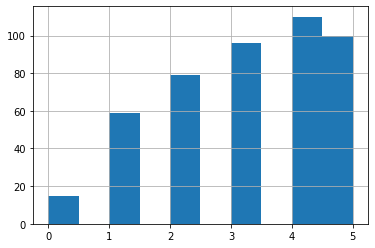

In [107]:
find_top(3)

In [108]:
np.count_nonzero(ordered_sum['rank'])

666

In [109]:
top_10 = ordered_sum.groupby('user').apply(lambda x: x.nlargest(10, 'sum')).droplevel(level=0)

#df.groupby('Brand').apply(lambda x: x.nlargest(2, 'Rank')).reset_index(drop=True)  


In [110]:
top_10.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1530 entries, (0, 'Penang Island') to (152, 'Marrakesh')
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city_id         1530 non-null   int64  
 1   food_sim        1530 non-null   float64
 2   attraction_sim  1530 non-null   float64
 3   rank            1530 non-null   float64
 4   var             1530 non-null   float64
 5   sum             1530 non-null   float64
 6   ranking_weight  1530 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 90.1+ KB


In [111]:
np.count_nonzero(top_10['rank'])

81

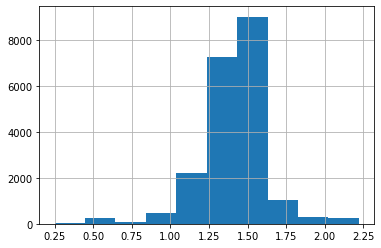

In [112]:
ordered_sum['ranking_weight'].hist()

### City to city sim scores

In [113]:
together = sim_city_a + sim_city_food

In [114]:
together.index.name = 'foo'

In [115]:
together.reset_index(inplace=True)

In [116]:
together

,foo,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,0,2.000000,1.015674,1.038187,1.288043,1.503462,1.655921,1.402494,1.832002,1.902551,...,1.907769,1.846039,1.201628,1.536358,1.425122,1.876865,1.212413,1.604216,1.637950,1.847718
1,1,1.015674,2.000000,1.977512,1.672664,1.339123,1.580334,1.749863,1.281994,1.108561,...,0.899174,1.038664,1.876362,1.200170,1.500226,1.040355,1.817342,1.384605,1.618717,1.350355
2,2,1.038187,1.977512,2.000000,1.562274,1.244756,1.601205,1.708055,1.249489,1.100895,...,0.898842,1.016019,1.857710,1.104433,1.387475,1.017477,1.815254,1.425932,1.608078,1.319063
3,3,1.288043,1.672664,1.562274,2.000000,1.811272,1.538806,1.809616,1.698694,1.437053,...,1.314179,1.496860,1.716299,1.724318,1.933841,1.523913,1.677612,1.352947,1.662165,1.720760
4,4,1.503462,1.339123,1.244756,1.811272,2.000000,1.473224,1.834637,1.837647,1.500137,...,1.496801,1.552299,1.613765,1.978903,1.937964,1.723553,1.529876,1.345458,1.539547,1.767224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,133,1.876865,1.040355,1.017477,1.523913,1.723553,1.571965,1.539828,1.964278,1.856765,...,1.953335,1.907284,1.289537,1.752096,1.667928,2.000000,1.264249,1.508755,1.619749,1.933578
134,134,1.212413,1.817342,1.815254,1.677612,1.529876,1.812282,1.867722,1.466296,1.338854,...,1.105723,1.278107,1.730624,1.452950,1.663462,1.264249,2.000000,1.737049,1.683274,1.524130
135,135,1.604216,1.384605,1.425932,1.352947,1.345458,1.941154,1.562920,1.568024,1.735582,...,1.508339,1.646398,1.268476,1.350081,1.450357,1.508755,1.737049,2.000000,1.686432,1.677326
136,136,1.637950,1.618717,1.608078,1.662165,1.539547,1.842093,1.730468,1.727939,1.705600,...,1.582714,1.681608,1.592800,1.506445,1.647398,1.619749,1.683274,1.686432,2.000000,1.768473


In [117]:
city_to_city_sim = together.melt('foo', var_name='city', value_name='sim_sum')

In [118]:
city_to_city_sim.rename(columns={'foo': 'label_id'}, inplace=True)

In [119]:
city_to_city_sim

,label_id,city,sim_sum
0,0,0,2.000000
1,1,0,1.015674
2,2,0,1.038187
3,3,0,1.288043
4,4,0,1.503462
...,...,...,...
19039,133,137,1.933578
19040,134,137,1.524130
19041,135,137,1.677326
19042,136,137,1.768473


In [120]:
split[split['city'] == "Frankfurt am main"]

,city,user


In [121]:
food[food['city'] == 'Frankfurt']

price_level,country,city,id,0.0,1.0,2.0,3.0,4.0,label_id
34,Germany,Frankfurt,87,10.0,63.0,92.0,69.0,16.0,46


In [122]:
city_num = pd.merge(left=split, right=food[['label_id', 'city']], on='city')

In [123]:
city_num.drop(columns=['user'], inplace=True)

In [124]:
city_name_sim = city_to_city_sim.merge(city_num.drop_duplicates(), on=['label_id'], 
                   how='left')

In [125]:
city_name_sim

,label_id,city_x,sim_sum,city_y
0,0,0,2.000000,Abu Dhabi
1,1,0,1.015674,Accra
2,2,0,1.038187,Agra
3,3,0,1.288043,Amman
4,4,0,1.503462,Amsterdam
...,...,...,...,...
19039,133,137,1.933578,Washington D.C.
19040,134,137,1.524130,Xi'an
19041,135,137,1.677326,Xiamen
19042,136,137,1.768473,Zhuhai


In [126]:
city_name_sim.rename(columns={'label_id': 'id_a', 'city_x': 'id_b', 'city_y': "city_a"}, inplace=True)

In [127]:
city_num.rename(columns={'label_id':'id_b'}, inplace=True)

In [128]:
city_name_sim = city_name_sim.merge(city_num.drop_duplicates(), on=['id_b'], 
                   how='left',)

In [129]:
city_name_sim

,id_a,id_b,sim_sum,city_a,city
0,0,0,2.000000,Abu Dhabi,Abu Dhabi
1,1,0,1.015674,Accra,Abu Dhabi
2,2,0,1.038187,Agra,Abu Dhabi
3,3,0,1.288043,Amman,Abu Dhabi
4,4,0,1.503462,Amsterdam,Abu Dhabi
...,...,...,...,...,...
19039,133,137,1.933578,Washington D.C.,Zurich
19040,134,137,1.524130,Xi'an,Zurich
19041,135,137,1.677326,Xiamen,Zurich
19042,136,137,1.768473,Zhuhai,Zurich


In [130]:
city_name_sim.rename(columns={'city': 'city_b'}, inplace=True)

In [131]:
city_name_sim.reset_index(inplace=True, drop=True)

In [132]:
city_name_sim

,id_a,id_b,sim_sum,city_a,city_b
0,0,0,2.000000,Abu Dhabi,Abu Dhabi
1,1,0,1.015674,Accra,Abu Dhabi
2,2,0,1.038187,Agra,Abu Dhabi
3,3,0,1.288043,Amman,Abu Dhabi
4,4,0,1.503462,Amsterdam,Abu Dhabi
...,...,...,...,...,...
19039,133,137,1.933578,Washington D.C.,Zurich
19040,134,137,1.524130,Xi'an,Zurich
19041,135,137,1.677326,Xiamen,Zurich
19042,136,137,1.768473,Zhuhai,Zurich


In [133]:
city_name_sim.set_index(['id_b', 'id_a'], inplace=True)

In [134]:
city_name_sim

sim_sum           city_a     city_b
id_b id_a                                      
0    0     2.000000        Abu Dhabi  Abu Dhabi
     1     1.015674            Accra  Abu Dhabi
     2     1.038187             Agra  Abu Dhabi
     3     1.288043            Amman  Abu Dhabi
     4     1.503462        Amsterdam  Abu Dhabi
...             ...              ...        ...
137  133   1.933578  Washington D.C.     Zurich
     134   1.524130            Xi'an     Zurich
     135   1.677326           Xiamen     Zurich
     136   1.768473           Zhuhai     Zurich
     137   2.000000           Zurich     Zurich

[19044 rows x 3 columns]

In [135]:
city_sim_final = city_name_sim.groupby('id_b').apply(pd.DataFrame.sort_values, 'sim_sum', ascending=False)

In [136]:
city_sim_final

sim_sum      city_a     city_b
id_b id_b id_a                                 
0    0    0     2.000000   Abu Dhabi  Abu Dhabi
          114   1.949442    San Jose  Abu Dhabi
          58    1.947667     Houston  Abu Dhabi
          36    1.936511      Dallas  Abu Dhabi
          57    1.931953    Honolulu  Abu Dhabi
...                  ...         ...        ...
137  137  2     1.319063        Agra     Zurich
          95    1.299619     Orlando     Zurich
          105   1.276459  Punta Cana     Zurich
          14    0.883447      Beirut     Zurich
          124   0.869125      Tehran     Zurich

[19044 rows x 3 columns]

In [137]:
city_sim_final.reset_index(level=0, drop=True, inplace=True)

In [138]:
city_sim_final.xs(27, level='id_b', drop_level=False)

sim_sum     city_a   city_b
id_b id_a                              
27   27    2.000000    Chengdu  Chengdu
     68    1.831715      Krabi  Chengdu
     79    1.786036     Manila  Chengdu
     80    1.780050  Marrakesh  Chengdu
     11    1.772978  Barcelona  Chengdu
...             ...        ...      ...
     32    1.046941    Colombo  Chengdu
     2     1.030108       Agra  Chengdu
     1     1.000488      Accra  Chengdu
     14    0.942358     Beirut  Chengdu
     124   0.932543     Tehran  Chengdu

[138 rows x 3 columns]

In [139]:
city_sim_final.xs(11, level='id_b', drop_level=False)

sim_sum     city_a     city_b
id_b id_a                                
11   11    2.000000  Barcelona  Barcelona
     81    1.939801      Mecca  Barcelona
     80    1.935486  Marrakesh  Barcelona
     79    1.922888     Manila  Barcelona
     51    1.922318    Hamburg  Barcelona
...             ...        ...        ...
     90    1.274723      Mugla  Barcelona
     110   1.262765     Riyadh  Barcelona
     122   1.185283     Sydney  Barcelona
     14    0.992936     Beirut  Barcelona
     124   0.822468     Tehran  Barcelona

[138 rows x 3 columns]

In [140]:
top_city_score = city_sim_final.groupby('id_b').apply(lambda x: x.nlargest(6, 'sim_sum')).droplevel(level=0)



In [141]:
two = top_city_score[top_city_score['sim_sum'] == 2.000000]


In [142]:
two

,,sim_sum,city_a,city_b
id_b,id_a,,,
0,0,2.0,Abu Dhabi,Abu Dhabi
1,1,2.0,Accra,Accra
2,2,2.0,Agra,Agra
3,3,2.0,Amman,Amman
4,4,2.0,Amsterdam,Amsterdam
...,...,...,...,...
132,132,2.0,Warsaw,Warsaw
133,133,2.0,Washington D.C.,Washington D.C.
134,134,2.0,Xi'an,Xi'an


In [143]:
list_int = [1,2,3,4,5,6]
top_city_score['list_int'] = np.tile(list_int, len(top_city_score)//len(list_int))

In [144]:
top_city_score.head(19)

sim_sum     city_a     city_b  list_int
id_b id_a                                          
0    0     2.000000  Abu Dhabi  Abu Dhabi         1
     114   1.949442   San Jose  Abu Dhabi         2
     58    1.947667    Houston  Abu Dhabi         3
     36    1.936511     Dallas  Abu Dhabi         4
     57    1.931953   Honolulu  Abu Dhabi         5
     128   1.907769    Toronto  Abu Dhabi         6
1    1     2.000000      Accra      Accra         1
     2     1.977512       Agra      Accra         2
     71    1.961263      Kyoto      Accra         3
     34    1.912174    Da Nang      Accra         4
     64    1.904999  Jerusalem      Accra         5
     120   1.898796      Sofia      Accra         6
2    2     2.000000       Agra       Agra         1
     1     1.977512      Accra       Agra         2
     71    1.964884      Kyoto       Agra         3
     34    1.918991    Da Nang       Agra         4
     120   1.894874      Sofia       Agra         5
     64    1.887347  Jerusalem       Agra         6
3    3     2.000000      Amman      Amman         1

In [145]:
top_city_score.pivot(values='city_a', index='city_b', columns='list_int')

list_int,1,2,3,4,5,6
city_b,,,,,,
NaN,NaN,Berlin,Madrid,Vienna,Amsterdam,Boston
Abu Dhabi,Abu Dhabi,San Jose,Houston,Dallas,Honolulu,Toronto
Accra,Accra,Agra,Kyoto,Da Nang,Jerusalem,Sofia
Agra,Agra,Accra,Kyoto,Da Nang,Sofia,Jerusalem
Amman,Amman,Saint Petersburg,Istanbul,Lima,Warsaw,Colombo
...,...,...,...,...,...,...
Washington D.C.,Washington D.C.,Atlanta,Houston,San Francisco,Toronto,Zurich
Xi'an,Xi'an,Heraklion,Rhodes,Chiang Mai,Macau,Cebu City
Xiamen,Xiamen,Shenzhen,Nice,Antalya,Mugla,Guangzhou


In [146]:
top_city_score.pivot(values='sim_sum', index='city_b', columns='list_int')

list_int,1,2,3,4,5,6
city_b,,,,,,
NaN,2.0,1.988594,1.979464,1.972598,1.969448,1.966777
Abu Dhabi,2.0,1.949442,1.947667,1.936511,1.931953,1.907769
Accra,2.0,1.977512,1.961263,1.912174,1.904999,1.898796
Agra,2.0,1.977512,1.964884,1.918991,1.894874,1.887347
Amman,2.0,1.975729,1.954896,1.946226,1.933841,1.917060
...,...,...,...,...,...,...
Washington D.C.,2.0,1.964278,1.963206,1.960322,1.953335,1.933578
Xi'an,2.0,1.959536,1.956818,1.944992,1.943103,1.943082
Xiamen,2.0,1.953070,1.941595,1.941154,1.910107,1.902699


In [147]:
top = pd.read_csv("/Users/tristannisbet/Documents/SM/Dataframe/new/top_city_num.csv", index_col=0)

In [148]:
top

,user,favorite_city_one,favorite_city_two,favorite_city_three,favorite_city_four,favorite_city_five,one,two,three,four,five
0,0,Krabi,Rome,Budapest,Zx,Zx,68,111,20,138,138
1,1,Cancun,Las Vegas,Los Angeles,New York City,London,23,72,76,93,75
2,2,Sydney,London,Dublin,Prague,Rome,122,75,41,103,111
3,3,Rome,London,Florence,Mexico City,Munich,111,75,45,84,92
4,4,Denpasar,Shanghai,Kyoto,New York City,Vancouver,39,117,71,93,129
...,...,...,...,...,...,...,...,...,...,...,...
148,148,Melbourne,Vancouver,Sydney,Zx,Zx,83,129,122,138,138
149,149,Atlanta,New York City,Cairo,Honolulu,San Francisco,7,93,22,57,113
150,150,Berlin,Los Angeles,Istanbul,Zx,Zx,15,76,60,138,138
151,151,Florence,Miami,Las Vegas,Zx,Zx,45,85,72,138,138


In [149]:
cities_top = cities.copy()

In [150]:
cities_top

,id,city,country
0,1,Hong Kong,Hong Kong
1,2,Bangkok,Thailand
2,3,London,United Kingdom
3,4,Macau,Macau
4,5,Singapore,Singapore
...,...,...,...
134,135,Accra,Ghana
135,136,Quito,Ecuador
136,137,Tianjin,China
137,138,Qingdao,China


In [151]:
diff = set(split.city).intersection(set(split3.city))
diff = list(diff)
print(len(diff))

NameError: name 'split3' is not defined